<a href="https://colab.research.google.com/github/itsvishalkjha/Physics-and-Machine-Learning/blob/main/Projectile_Motion_Predictor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal Launch Angle (degrees): 35


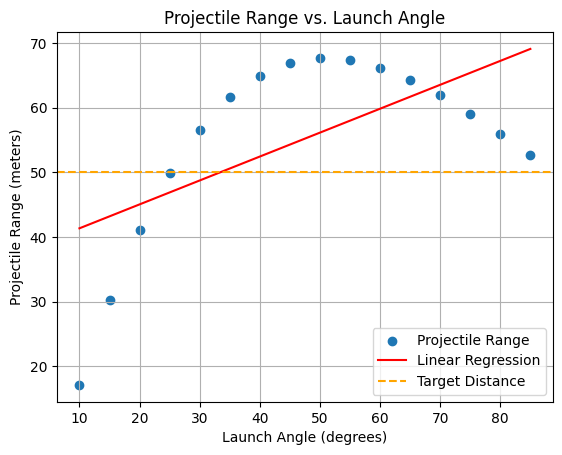

''

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assume target location
target_x = 50  # Target's x-coordinate (horizontal distance in meters)

# Fixed initial velocity (m/s)
initial_velocity = 20

# Creating the dataset with launch angles (in degrees) and corresponding ranges (in meters)
launch_angles_degrees = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
ranges = np.array([17.12, 30.27, 41.10, 49.84, 56.61, 61.60, 64.98, 66.93, 67.66, 67.33, 66.16, 64.30, 61.89, 59.07, 55.96, 52.68])

# Reshape launch_angles_degrees to a 2D array (required by scikit-learn)
X = launch_angles_degrees.reshape(-1, 1)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X, ranges)

# Predict the range for all launch angles
predicted_ranges = model.predict(X)

# Find the launch angle that results in the predicted range closest to the target distance
closest_range = min(predicted_ranges, key=lambda x: abs(x - target_x))
optimal_launch_angle_degrees = launch_angles_degrees[np.argmin(np.abs(predicted_ranges - closest_range))]

print("Optimal Launch Angle (degrees):", optimal_launch_angle_degrees)

# Plot the original projectile range data and the linear regression line
plt.scatter(launch_angles_degrees, ranges, label='Projectile Range')
plt.plot(launch_angles_degrees, predicted_ranges, color='red', label='Linear Regression')
plt.axhline(target_x, color='orange', linestyle='--', label='Target Distance')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Projectile Range (meters)')
plt.title('Projectile Range vs. Launch Angle')
plt.legend()
plt.grid()
plt.show()
""